# Quasi-1D flow in a converging-diverging nozzle
In this notebook we will explore the flow in a converging-diverging nozzle.
The objective of this notebook is to explore the effect of *back pressure*
relative to the upstream stagnation pressure.

### Set up the module

In [1]:
using Gasdynamics1D

In [2]:
using Plots

### Set up a nozzle
First, we will set up a nozzle. For this, we will create a representative
nozzle shape: a bell-shaped converging inlet and a slowly increasing diverging
section. We set the inlet area, the throat area, and the exit area:

In [3]:
Ai = Area(100,units=SqCM)
At = Area(30,units=SqCM)
Ae = Area(60,units=SqCM)
noz = Nozzle(Ai,At,Ae)

Converging-diverging nozzle
   Inlet area (sq cm)= 100.0
   Throat area (sq cm)= 30.0
   Exit area (sq cm)= 60.0


Let's plot this nozzle to see it's shape

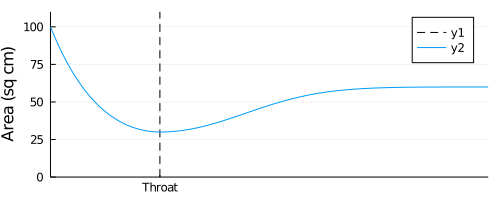

In [4]:
nozzleplot(noz)

### Create a flow through the nozzle
Let's set the conditions to create a flow through this nozzle. We need
to set the stagnation conditions upstream of the nozzle. We will use stagnation
pressure and temperature.

In [5]:
p0 = StagnationPressure(700,units=KPa)
T0 = StagnationTemperature(30,units=C)

StagnationTemperature = 303.15 Kelvin

We also need a back pressure, outside of the nozzle exit. Let's try setting it
to 660 KPa, a little bit below the stagnation pressure

In [6]:
pb = Pressure(660,units=KPa)

Pressure = 660000.0 Pascals

Now we have enough information to solve this flow. Let's plot it. We
need to specify which quantities we wish to show. We will show pressure
and Mach number. We could also show temperature and density.

The plot below shows that the pressure reaches a minimum in the throat
and the Mach number reaches a maximum there. However, it does not quite
get to sonic conditions.

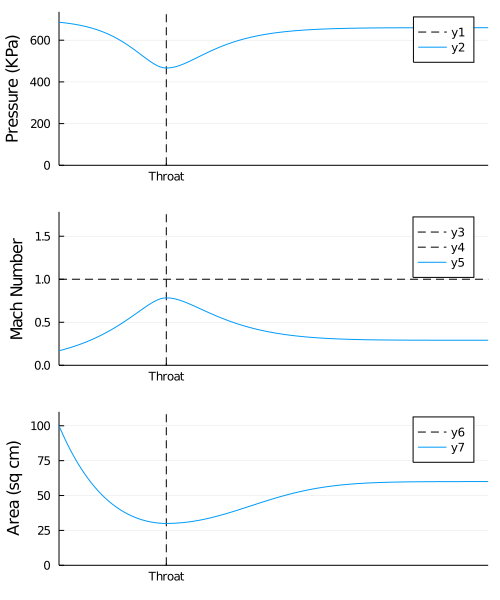

In [7]:
nozzleplot(noz,pb,p0,T0,fields=("pressure","machnumber"))

One note on the last plots: We could have specified the gas, but it defaults to air.

### Lowering the back pressure
What happens if we lower the back pressure further? Let's try this.
For several back pressures, we get a *shock* in the diverging section.
As back pressure gets smaller, this shock appears closer to the exit.
Finally, the shock leaves the nozzle entirely.

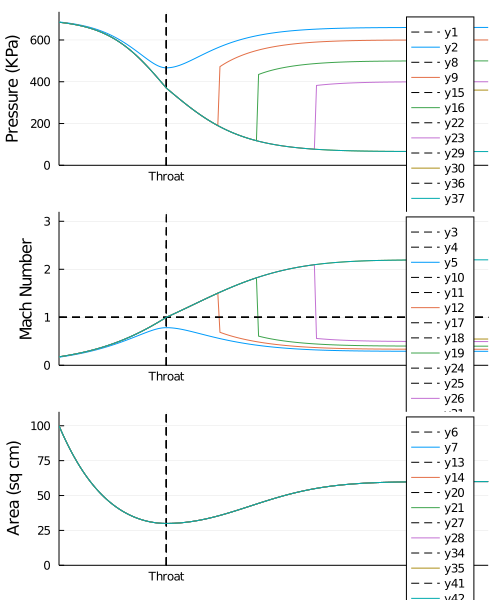

In [8]:
nozzleplot(noz,Pressure(660,units=KPa),p0,T0,fields=("pressure","mach"))
nozzleplot!(noz,Pressure(600,units=KPa),p0,T0,fields=("pressure","mach"))
nozzleplot!(noz,Pressure(500,units=KPa),p0,T0,fields=("pressure","mach"))
nozzleplot!(noz,Pressure(400,units=KPa),p0,T0,fields=("pressure","mach"))
nozzleplot!(noz,Pressure(360,units=KPa),p0,T0,fields=("pressure","mach"))
nozzleplot!(noz,Pressure(300,units=KPa),p0,T0,fields=("pressure","mach"))

### Mass flow rate
What is the mass flow rate through the nozzle? Let's inspect this value
for a few back pressures. First, the case with 660 KPa:

In [9]:
nozproc = NozzleProcess(noz,Pressure(660,units=KPa),p0,T0)
massflowrate(nozproc)

MassFlowRate = 4.66365 KGPerSec

Now with 600 KPa

In [10]:
nozproc = NozzleProcess(noz,Pressure(600,units=KPa),p0,T0)
massflowrate(nozproc)

MassFlowRate = 4.87495 KGPerSec

And now with 500 KPa

In [11]:
nozproc = NozzleProcess(noz,Pressure(500,units=KPa),p0,T0)
massflowrate(nozproc)

MassFlowRate = 4.87495 KGPerSec

Notice that the mass flow rate is stuck. No matter how much we
lower the back pressure, we cannot increase the mass flow rate.
The flow is *choked*.

We can classify the type of flow with the `flow_quality` function:

In [12]:
nozproc = NozzleProcess(noz,Pressure(600,units=KPa),p0,T0)
flow_quality(nozproc)

"Supersonic with normal shock"

There is a normal shock in the diverging section

In [13]:
nozproc = NozzleProcess(noz,Pressure(100,units=KPa),p0,T0)
flow_quality(nozproc)

"Overexpanded supersonic"

This is over-expanded: the exit pressure is too small and the flow needs to pass
through shocks outside the nozzle to get up to the back pressure.

In [14]:
nozproc = NozzleProcess(noz,Pressure(60,units=KPa),p0,T0)
flow_quality(nozproc)

"Underexpanded supersonic"

This is under-expanded: the exit pressure is not low enough and the flow needs
to pass through an *expansion fan* outside the nozzle to lower its pressure
further to get down to the back pressure.

When we seek to generate a supersonic exit flow, as is often the case,
then our goal is to design it so that the flow is *perfectly expanded*.
We can find the required back pressure easily, using isentropic relations:

In [15]:
Ae = nozzleexit(noz)
Astar = throat(noz)
pb = Pressure(SupersonicPOverP0(Ae,Astar,Isentropic)*p0,units=KPa)

Pressure = 6.57529e7 Pascals

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*